In [27]:
!pip install pandas

In [28]:
import pandas as pd
data = pd.read_csv('data\Mobil Listrik.csv')
data.head()

<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7744\3833025569.py:2: SyntaxWarning: invalid escape sequence '\M'
  data = pd.read_csv('data\Mobil Listrik.csv')


,full_text,Sentimen
0,4/9 Secara ekonomi mengajak seseorang beralih ...,Positif
1,@innovacommunity Pantas mobil listrik sepi ter...,Negatif
2,@tempodotco Baiknya dikembangkan sendiri misal...,Netral
3,Alternator pada mobil tidak hanya berperan seb...,Negatif
4,@arif_brata Kalau Rebecca di modif jadi mobil ...,Positif


In [29]:
data.shape

(686, 2)

In [30]:
data.isnull().sum()

full_text    0
Sentimen     0
dtype: int64

In [31]:
data.duplicated().sum()

np.int64(0)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  686 non-null    object
 1   Sentimen   686 non-null    object
dtypes: object(2)
memory usage: 10.8+ KB


In [33]:
!pip install -U scikit-learn
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data.Sentimen = le.fit_transform(data.Sentimen.values)
data.head()

,full_text,Sentimen
0,4/9 Secara ekonomi mengajak seseorang beralih ...,2
1,@innovacommunity Pantas mobil listrik sepi ter...,0
2,@tempodotco Baiknya dikembangkan sendiri misal...,1
3,Alternator pada mobil tidak hanya berperan seb...,0
4,@arif_brata Kalau Rebecca di modif jadi mobil ...,2


In [34]:
import re

def casefolding(text):
    text = text.lower()
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?://\S+', '', text)

    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [35]:
raw_sample = data['full_text'].iloc[10]
case_folding = casefolding(raw_sample)

print('Raw_data\t:', raw_sample) # Data Sebelum di Preprocessing
print('\nCase Folding\t:', case_folding) # Data Setelah di Preprocessing

Raw_data	: @laci_spbu @innovacommunity Mikir mobil listrik sebagai mobil pertama sj sudah aneh

Case Folding	: mikir mobil listrik sebagai mobil pertama sj sudah aneh


In [36]:
key_norm = pd.read_csv('data\key_norm.csv')
print(key_norm.head(10))

key_norm.shape

   _id      singkat       hasil
0    1         abis       habis
1    2       accent     tekanan
2    3       accept      terima
3    4     accident  kecelakaan
4    5  achievement    prestasi
5    6         acra       acara
6    7       acrany    acaranya
7    8       acrnya    acaranya
8    9       action        aksi
9   10       active       aktif


<>:1: SyntaxWarning: invalid escape sequence '\k'
<>:1: SyntaxWarning: invalid escape sequence '\k'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7744\2463187717.py:1: SyntaxWarning: invalid escape sequence '\k'
  key_norm = pd.read_csv('data\key_norm.csv')


(4388, 3)

In [37]:
def text_normalize(text):
    text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] 
                     if (key_norm["singkat"] == word).any() 
                     else word 
                     for word 
                     in text.split()])
    text = str.lower(text)
    return text

In [38]:
raw_sample = data['full_text'].iloc[10]
case_folding = casefolding(raw_sample)
normalisasi = text_normalize(case_folding)

print('Raw_data\t:', raw_sample) # Data Sebelum di Preprocessing
print('\nCase Folding\t:', case_folding) # Data Setelah di Case Folding
print('\nNormalisasi\t:', normalisasi) # Data Setelah di Normalisasi

Raw_data	: @laci_spbu @innovacommunity Mikir mobil listrik sebagai mobil pertama sj sudah aneh

Case Folding	: mikir mobil listrik sebagai mobil pertama sj sudah aneh

Normalisasi	: berfikir mobil listrik sebagai mobil pertama saja sudah aneh


In [39]:
import nltk
nltk.download('punkt_tab')  # Redownload

from nltk.tokenize import word_tokenize

def word_tokenize_wrapper(text):
    tokens = word_tokenize(text)
    tokens_str = ', '.join(tokens)
    return tokens_str

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [40]:
raw_sample = data['full_text'].iloc[10]
case_folding = casefolding(raw_sample)
normalisasi = text_normalize(case_folding)
tokenize = word_tokenize_wrapper(normalisasi)

print('Raw_data\t:', raw_sample)  # Data Sebelum di Preprocessing
print('\nCase Folding\t:', case_folding)  # Data Setelah di Case Folding
print('\nNormalisasi\t:', normalisasi)  # Data Setelah di Normalisasi
print('\nTokenize\t:', tokenize)  # Data Setelah di Tokenize

Raw_data	: @laci_spbu @innovacommunity Mikir mobil listrik sebagai mobil pertama sj sudah aneh

Case Folding	: mikir mobil listrik sebagai mobil pertama sj sudah aneh

Normalisasi	: berfikir mobil listrik sebagai mobil pertama saja sudah aneh

Tokenize	: berfikir, mobil, listrik, sebagai, mobil, pertama, saja, sudah, aneh


In [41]:
!pip install stopwords

In [42]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stopwords_ind = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
stopwords_ind = stopwords.words('indonesian')
more_stopword = ['daring', 'online', 'pd']

def remove_stop_words(text):
    sw = stopwords_ind + more_stopword
    clean_words = []
    text = text.split()
    for word in text:
        if word not in sw:
            clean_words.append(word)
    return " ".join(clean_words)

In [44]:
raw_sample = data['full_text'].iloc[8]
case_folding = casefolding(raw_sample)
normalisasi = text_normalize(case_folding)
tokenize = word_tokenize_wrapper(normalisasi)
stopwords = remove_stop_words(tokenize)

print('Raw_data\t:', raw_sample) # Data Sebelum di Preprocessing
print('\nCase Folding\t:', case_folding) # Data Setelah di Case Folding
print('\nNormalisasi\t:', normalisasi) # Data Setelah di Normalisasi
print('\nTokenize\t:', tokenize) # Data Setelah di Tokenize
print('\nStopwords\t:', stopwords) # Data Setelah di Stopwords

Raw_data	: @MrOngDedy kalo dipikir pikir gw kek mau mobil listrik aja liat bensin ini

Case Folding	: kalo dipikir pikir gw kek mau mobil listrik aja liat bensin ini

Normalisasi	: kalau dipikir pikir saya seperti mau mobil listrik saja lihat bensin ini

Tokenize	: kalau, dipikir, pikir, saya, seperti, mau, mobil, listrik, saja, lihat, bensin, ini

Stopwords	: kalau, dipikir, pikir, saya, seperti, mau, mobil, listrik, saja, lihat, bensin,


In [45]:
!pip install Sastrawi

In [46]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text):
  text = stemmer.stem(text)
  return text

In [47]:
raw_sample = data['full_text'].iloc[8]
case_folding = casefolding(raw_sample)
normalisasi = text_normalize(case_folding)
tokenize = word_tokenize_wrapper(normalisasi)
stopwords = remove_stop_words(tokenize)
stemmed = stemming(stopwords)

print('Raw_data\t:', raw_sample) # Data Sebelum di Preprocessing
print('\nCase Folding\t:', case_folding) # Data Setelah di Case Folding
print('\nNormalisasi\t:', normalisasi) # Data Setelah di Normalisasi
print('\nTokenize\t:', tokenize) # Data Setelah di Tokenize
print('\nStopwords\t:', stopwords) # Data Setelah di Stopwords
print('\nStemming\t:', stemmed) # Data Setelah di Stemming

Raw_data	: @MrOngDedy kalo dipikir pikir gw kek mau mobil listrik aja liat bensin ini

Case Folding	: kalo dipikir pikir gw kek mau mobil listrik aja liat bensin ini

Normalisasi	: kalau dipikir pikir saya seperti mau mobil listrik saja lihat bensin ini

Tokenize	: kalau, dipikir, pikir, saya, seperti, mau, mobil, listrik, saja, lihat, bensin, ini

Stopwords	: kalau, dipikir, pikir, saya, seperti, mau, mobil, listrik, saja, lihat, bensin,

Stemming	: kalau pikir pikir saya seperti mau mobil listrik saja lihat bensin


In [48]:
def text_preprocessing_process(text):
    text = casefolding(text)
    text = text_normalize(text)
    text = word_tokenize_wrapper(text)
    text = remove_stop_words(text)
    text = stemming(text)
    return text

In [49]:
%%time
data['clean_text'] = data['full_text'].apply(text_preprocessing_process)

CPU times: total: 2min 15s
Wall time: 3min 5s


In [50]:
data

,full_text,Sentimen,clean_text
0,4/9 Secara ekonomi mengajak seseorang beralih ...,2,49 cara ekonomi ajak orang alih dari kendara m...
1,@innovacommunity Pantas mobil listrik sepi ter...,0,pantas mobil listrik sepi nyata ada musuh
2,@tempodotco Baiknya dikembangkan sendiri misal...,1,baik kembang sendiri misal mobil esemka buat j...
3,Alternator pada mobil tidak hanya berperan seb...,0,alternator pada mobil tidak hanya peran bagai ...
4,@arif_brata Kalau Rebecca di modif jadi mobil ...,2,kalau rebecca di modif jadi mobil listrik sama...
...,...,...,...
681,@OCHN utk kasus nissan kicks (series hybrid) s...,1,untuk kasus nissan kicks series hybrid sama pe...
682,@EllatheriaOfc @AM_EllaJKT48 Mobil listrik,1,mobil listrik
683,beli mobil listrik biar mengurangi polusi udara,1,beli mobil listrik biar kurang polusi udara
684,Buat yg mo beli mobil jgn buru2 krn skrg trend...,2,buat yang mau beli mobil jangan buru2 karena s...


In [51]:
data.isnull().sum()

full_text     0
Sentimen      0
clean_text    0
dtype: int64

In [52]:
data['clean_text'].duplicated().sum()

np.int64(3)

In [53]:
data = data.drop_duplicates(subset=['clean_text'])
data['clean_text'].duplicated().sum()

np.int64(0)

In [54]:
data.shape

(683, 3)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 685
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   full_text   683 non-null    object
 1   Sentimen    683 non-null    int64 
 2   clean_text  683 non-null    object
dtypes: int64(1), object(2)
memory usage: 21.3+ KB


In [56]:
!pip install seaborn

Total Negatif        : 160
Total Netral         : 201
Total Positif        : 322
Total Data           : 683



([0, 1, 2], [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2')])

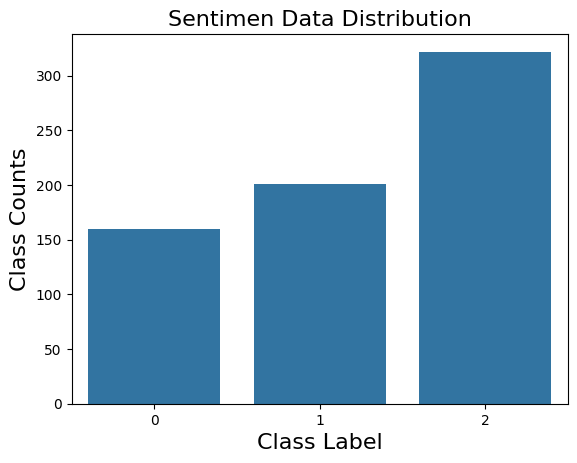

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
# Cek jumlah positive, negative dan netral
negatif = data[data['Sentimen'] == 0]
netral = data[data['Sentimen'] == 1]
positif = data[data['Sentimen'] == 2]

print('Total Negatif        : {}'.format(len(negatif)))
print('Total Netral         : {}'.format(len(netral)))
print('Total Positif        : {}'.format(len(positif)))
print('Total Data           : {}'.format(data.shape[0]))
print('')

sns.countplot(x='Sentimen', data=data)
plt.title('Sentimen Data Distribution', fontsize=16)
plt.ylabel('Class Counts', fontsize=16)
plt.xlabel('Class Label', fontsize=16)
plt.xticks(rotation='horizontal')

In [58]:
!pip install wordcloud

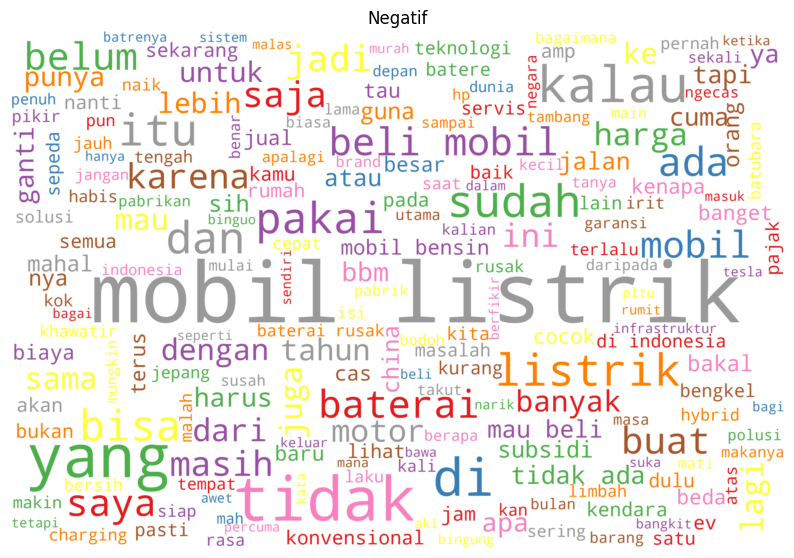

In [59]:
from wordcloud import WordCloud

all_text_s0 = ' '.join(word for word in negatif["clean_text"])
wordcloud = WordCloud(colormap='Set1', width=3000, height=2000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.title('Negatif')
plt.show()

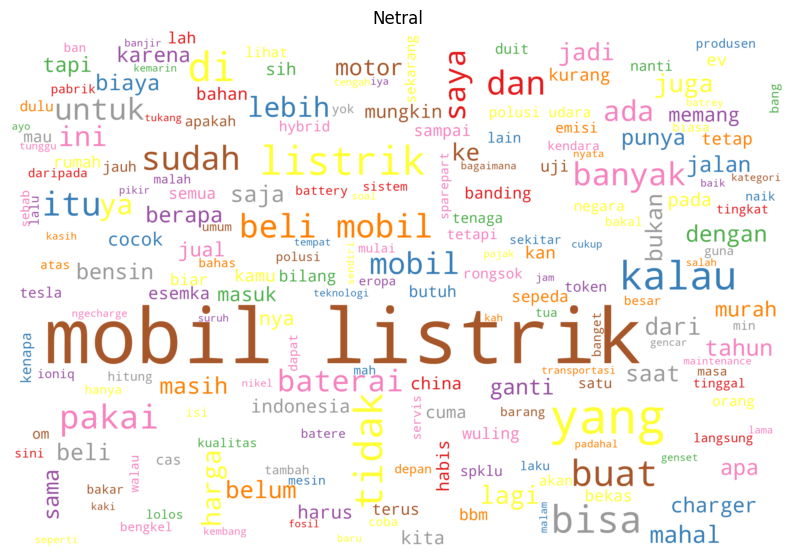

In [60]:
all_text_s0 = ' '.join(word for word in netral["clean_text"])
wordcloud = WordCloud(colormap='Set1', width=3000, height=2000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.title('Netral')
plt.show()

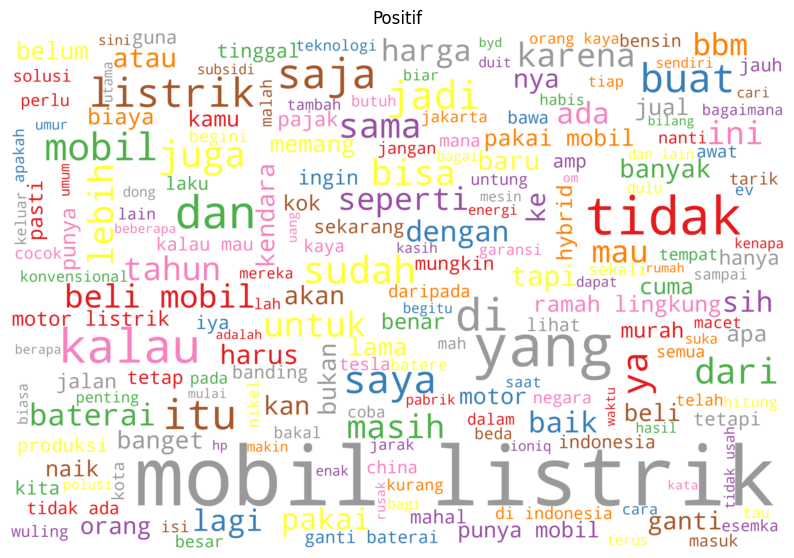

In [61]:
all_text_s0 = ' '.join(word for word in positif["clean_text"])
wordcloud = WordCloud(colormap='Set1', width=3000, height=2000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.title('Positif')
plt.show()

In [62]:
X = data['clean_text']
y = data['Sentimen']

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

In [64]:
!pip install imblearn

In [65]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_vectorized, y)

In [66]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
nb_model = MultinomialNB()
rf_model = RandomForestClassifier(random_state=42)

In [67]:
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
def evaluate_model(model, X, y, k):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    y_pred = cross_val_predict(model, X, y, cv=kf)
    labels = np.unique(y)
    cm = confusion_matrix(y, y_pred, labels=labels)
    report = classification_report(y, y_pred, labels=labels)
    return cm, report

In [68]:
def find_best_k(model, X, y, k_values):
    best_k = 0
    best_score = 0
    for k in k_values:
        kf = KFold(n_splits=k, shuffle=True, random_state=42)
        scores = cross_val_score(model, X, y, cv=kf)
        avg_score = np.mean(scores)
        print(f'K: {k}, Cross-Validation Accuracy: {avg_score:.4f}')
        if avg_score > best_score:
            best_score = avg_score
            best_k = k
    return best_k, best_score

In [69]:
k_values = range(2, 11)
best_k_nb, best_score_nb = find_best_k(nb_model, X_resampled, y_resampled, k_values)
print(f'Best K for Naive Bayes: {best_k_nb}, Best Cross-Validation Accuracy: {best_score_nb:.4f}')

K: 2, Cross-Validation Accuracy: 0.5839
K: 3, Cross-Validation Accuracy: 0.6501
K: 4, Cross-Validation Accuracy: 0.6927
K: 5, Cross-Validation Accuracy: 0.7101
K: 6, Cross-Validation Accuracy: 0.7205
K: 7, Cross-Validation Accuracy: 0.7174
K: 8, Cross-Validation Accuracy: 0.7206
K: 9, Cross-Validation Accuracy: 0.7154
K: 10, Cross-Validation Accuracy: 0.7279
Best K for Naive Bayes: 10, Best Cross-Validation Accuracy: 0.7279


In [70]:
best_k_rf, best_score_rf = find_best_k(rf_model, X_resampled, y_resampled, k_values)
print(f'Best K for Random Forest: {best_k_rf}, Best Cross-Validation Accuracy: {best_score_rf:.4f}')

K: 2, Cross-Validation Accuracy: 0.6770
K: 3, Cross-Validation Accuracy: 0.7122
K: 4, Cross-Validation Accuracy: 0.7371
K: 5, Cross-Validation Accuracy: 0.7412
K: 6, Cross-Validation Accuracy: 0.7484
K: 7, Cross-Validation Accuracy: 0.7391
K: 8, Cross-Validation Accuracy: 0.7412
K: 9, Cross-Validation Accuracy: 0.7371
K: 10, Cross-Validation Accuracy: 0.7661
Best K for Random Forest: 10, Best Cross-Validation Accuracy: 0.7661


In [71]:
kf_nb = KFold(n_splits=best_k_nb, shuffle=True, random_state=42)
kf_rf = KFold(n_splits=best_k_rf, shuffle=True, random_state=42)

In [72]:
nb_cm, nb_report = evaluate_model(nb_model, X_resampled, y_resampled, best_k_nb)
print('Naive Bayes Confusion Matrix:')
print(nb_cm)
print('Naive Bayes Classification Report:')
print(nb_report)

Naive Bayes Confusion Matrix:
[[285  13  24]
 [ 44 241  37]
 [102  43 177]]
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.89      0.76       322
           1       0.81      0.75      0.78       322
           2       0.74      0.55      0.63       322

    accuracy                           0.73       966
   macro avg       0.74      0.73      0.72       966
weighted avg       0.74      0.73      0.72       966



In [73]:
rf_cm, rf_report = evaluate_model(rf_model, X_resampled, y_resampled, best_k_rf)
print('Random Forest Confusion Matrix:')
print(rf_cm)
print('Random Forest Classification Report:')
print(rf_report)

Random Forest Confusion Matrix:
[[243  27  52]
 [  8 262  52]
 [ 22  65 235]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.75      0.82       322
           1       0.74      0.81      0.78       322
           2       0.69      0.73      0.71       322

    accuracy                           0.77       966
   macro avg       0.77      0.77      0.77       966
weighted avg       0.77      0.77      0.77       966



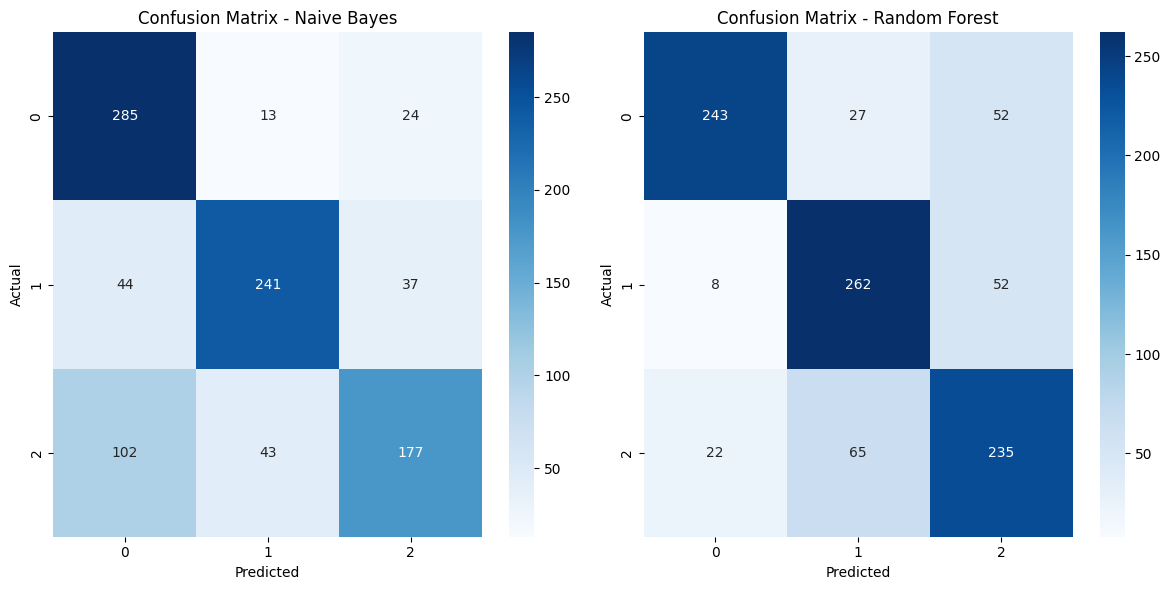

In [74]:
# Plot confusion matrix untuk Naive Bayes
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plot confusion matrix untuk Random Forest
plt.subplot(1, 2, 2)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

In [75]:
import pickle

In [76]:
nb_model.fit(X_resampled, y_resampled)

MultinomialNB()

In [77]:
rf_model.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [78]:
with open('best_nb_model.pkl', 'wb') as file:
    pickle.dump((vectorizer, nb_model), file)

with open('best_rf_model.pkl', 'wb') as file:
    pickle.dump((vectorizer, rf_model), file)

In [79]:
with open('best_nb_model.pkl', 'rb') as file:
    vectorizer, best_nb_model = pickle.load(file)

with open('best_rf_model.pkl', 'rb') as file:
    vectorizer, best_rf_model = pickle.load(file)

In [80]:
sample_texts = ['Saya sangat senang dengan produk ini']
vectorize = vectorizer.transform(sample_texts)

In [81]:
nb_predictions = best_nb_model.predict(vectorize)
rf_predictions = best_rf_model.predict(vectorize)

In [82]:
print('Naive Bayes Predictions:', nb_predictions)
print('Random Forest Predictions:', rf_predictions)

Naive Bayes Predictions: [0]
Random Forest Predictions: [2]
